In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

sns.set(style="darkgrid")

In [3]:
df_train = pd.read_csv("../data/dataset/train.csv")
df_test = pd.read_csv("../data/dataset/test.csv")
df_train = df_train.drop("id", axis=1)
df_test = df_test.drop("id", axis=1)

In [4]:
scaler = StandardScaler()
scaler.fit(df_train.drop("MedHouseVal", axis=1).values)
df_X = pd.DataFrame(scaler.transform(df_train.drop("MedHouseVal", axis=1).values))
df_y = df_train["MedHouseVal"]
X_test = pd.DataFrame(scaler.transform(df_test.values))

In [5]:
X_train, X_val, y_train, y_val = train_test_split(df_X, df_y, test_size=0.2, random_state=0, shuffle=True)

In [6]:
def overfitting(model, X_train, y_train, X_val, y_val):
    mse_train = mean_squared_error(y_train, model.predict(X_train))
    mse_val = mean_squared_error(y_val, model.predict(X_val))
    print(f'MSE train: {mse_train}')
    print(f'MSE test: {mse_val}')
    return

In [52]:
class my_Random_Forest():
    def __init__(self, 
                 n_estimators=100, 
                 max_depth=None, 
                 bootstrap_sample_size=None,
                 min_samples_leaf=1,
                 min_samples_split=2):
        self.n_estimators = n_estimators
        self.bootstrap_sample_size = bootstrap_sample_size
        self.estimators = [DecisionTreeRegressor(max_depth=max_depth, 
                                                 min_samples_leaf=min_samples_leaf,
                                                 min_samples_split=min_samples_split)
                           for _ in range(n_estimators)]

    def fit(self, X, y):
        hist_mse = []
        mse_acc = 0
        for i, estimator in tqdm(enumerate(self.estimators)):
            if self.bootstrap_sample_size:
                indices = np.random.choice(len(X), size=self.bootstrap_sample_size, replace=True)
            else:
                indices = np.random.choice(len(X), size=len(X), replace=True)
            X_bootstrap = df_X.loc[indices]
            y_bootstrap = df_y.loc[indices]
            estimator.fit(X_bootstrap, y_bootstrap)
            
            y_pred = estimator.predict(X)
            mse_acc += mean_squared_error(y, y_pred)
            hist_mse.append(mse_acc / (i+1))
        return hist_mse

    def predict(self, X):
        predictions = np.array([estimator.predict(X) for estimator in self.estimators])
        return np.mean(predictions, axis=0)

0it [00:00, ?it/s]

MSE train: 0.4933457913479583
MSE test: 0.5027086118929661


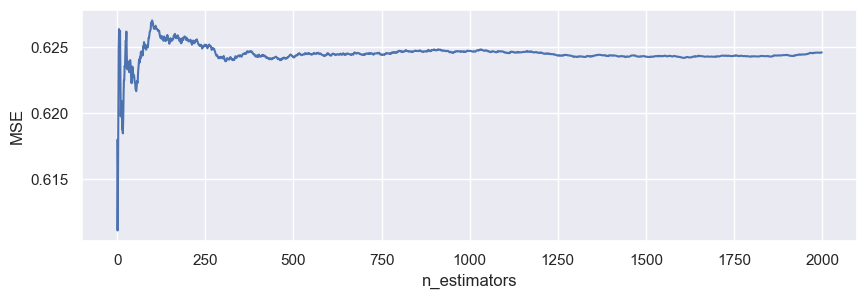

In [70]:
rf = my_Random_Forest(n_estimators=2000,
                      max_depth=4, 
                      bootstrap_sample_size=1000, 
                      min_samples_leaf=5,
                      min_samples_split=10)
hist_mse = rf.fit(X_train, y_train)
overfitting(rf, X_train, y_train, X_val, y_val)

fig = plt.figure(figsize=(10, 3))
sns.lineplot(x=range(len(hist_mse)), y=hist_mse)
plt.ylabel("MSE")
plt.xlabel("n_estimators")
plt.show()

In [57]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
overfitting(linear_model, X_train, y_train, X_val, y_val)

MSE train: 0.531778287245711
MSE test: 0.5308893517341526


In [62]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.transform(X_val)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
overfitting(poly_model, X_train_poly, y_train, X_val_poly, y_val)

MSE train: 0.44985238207986533
MSE test: 0.4624090392856305
